| |<font size="5">XGboost خوارزمية     </font>|
|-:|-|
|<font size="3"> ![](https://www.edureka.co/blog/wp-content/uploads/2019/06/How-Does-Boosting-Algorithm-Work-Boosting-Machine-Learning-Edureka-min-528x254.png) </font>| 
|<font size="3"> تحميل البيانات </font>| 
|<font size="3"> Train, Test  تحديد بيانات التدريب والاختبار </font>| 
|<font size="3">PipeLine  انشاء بنية معالجة متسلسلة للبيانات  </font>| 
|<font size="3">XGBRegressor تحديد خوارزميات المعالجة </font>| 
|<font size="3"> training   تدريب البيانات </font>| 
|<font size="3"> Metrics   تقمويم أداء الخوارزمية </font>| 
|<font size="3"> </font>| 

[Ref:  Xgboost](https://arabicprogrammer.com/article/117099373/)

In [ ]:
pwd

'/content'

In [ ]:
cd drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [ ]:
ls ./data/

Advertising.csv                       HousePrice2.csv
bst_features.csv                      HousePrice3.csv
bst_target.csv                        HousePrice_4.csv
california_housing_test.csv           housePrice_5.csv
california_housing_train.csv          HousePrice_5.csv
churn_1.csv                           HousePrice.csv
churn_features.csv                    kidney_disease.csv
churn_target.csv                      mushroom_data_all.csv
churn.txt                             pandas_1.csv
data_1.csv                            pandas_2.csv
data_cleaned.csv                      pandas_3.csv
df_merged.cvs                         sales.csv
features_kept1.csv                    sales-funnel.xlsx
features_selected.txt                 wdbc.data
Google_Stock_Price_Test.textClipping  weather.csv
HousePrice1.csv


In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/housePrice_5.csv", index_col=0)

In [ ]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,2ndFlrSF,BsmtFinSF1,1stFlrSF,MiscVal,LotArea,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,Electrical,GarageType,SaleType,SaleCondition,SalePrice
0,5,548,2566,196.0,0,854,706,856,0,8450,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,208500
1,31,460,2524,0.0,298,0,978,1262,0,9600,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,CBlock,GasA,SBrkr,Attchd,WD,Normal,181500
2,6,608,2706,162.0,0,866,486,920,0,11250,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,223500
3,36,642,2473,0.0,0,756,216,961,0,9550,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,SBrkr,Detchd,WD,Abnorml,140000
4,8,836,3343,350.0,192,1053,655,1145,0,14260,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,PConc,GasA,SBrkr,Attchd,WD,Normal,250000


In [ ]:

df.shape

(1460, 31)

![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [ ]:
#  طيبعة البيانات  وعدد البيانات الناقصة
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1460 non-null   int64  
 1   GarageArea     1460 non-null   int64  
 2   TotalSF        1460 non-null   int64  
 3   MasVnrArea     1452 non-null   float64
 4   WoodDeckSF     1460 non-null   int64  
 5   2ndFlrSF       1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   MiscVal        1460 non-null   int64  
 9   LotArea        1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Street         1460 non-null   object 
 12  LandContour    1460 non-null   object 
 13  Utilities      1460 non-null   object 
 14  LotConfig      1460 non-null   object 
 15  Neighborhood   1460 non-null   object 
 16  Condition1     1460 non-null   object 
 17  Condition2     1460 non-null   object 
 18  BldgType

In [ ]:
df.select_dtypes("object").columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.select_dtypes("number").columns

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'SalePrice'],
      dtype='object')

In [ ]:
# التدقيق في احصائيات البينات للوقوف على التباين فيها إن وجد
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1460.0,22.950000,20.640653,-1.0,4.0,14.0,41.00,60.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.5,480.0,576.00,1418.0
TotalSF,1460.0,2572.893151,823.598492,334.0,2014.0,2479.0,3008.50,11752.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0
WoodDeckSF,1460.0,94.244521,125.338794,0.0,0.0,0.0,168.00,857.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.0,0.0,728.00,2065.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.0,0.00,15500.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0


- ضرورة اعادة توزيع البيانات خصوصا تلك التي تشهد تباينا كبير يظهر بالاساس في فارق القيم الصغرى والكبرى

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [ ]:

#Standardize the features by removing the mean and scaling to unit variance.
# تحديد الخصائص والهدف
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF', '2ndFlrSF',
       'BsmtFinSF1', '1stFlrSF', 'MiscVal', 'LotArea', 'MSZoning', 'Street',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
#  لن نقوم بحذف جميع القيم الناقصة ولكن سنعالجها  (  to carry on From here)
# df.dropna(inplace=True)


In [ ]:
X.shape

(1460, 30)

In [ ]:
ls ./imgs/Train*

./imgs/Train-test-1.jpg


![](https://drive.google.com/file/d/1OsLLaeMzJYL0MxBG2aywJlKdbcaeuTiB/view?usp=sharing)

In [ ]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)



## Ppeline  توظيف المعالجة المتسلسلة 
![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


<img src="https://i.ibb.co/16B5Nq1/grid-Search-CV.png" width=600></img>

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import  

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  

num_pipeline= make_pipeline(
    SimpleImputer(strategy="mean" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    StandardScaler()    # تغيير سلم البيانات الرقمية 
)

cat_pipeline= make_pipeline(
    SimpleImputer(strategy="most_frequent" ),# تحديد الوسيط كبديل عن كل القيم الناقصة في الجدول  " most_frequent"
    OneHotEncoder(handle_unknown="ignore", sparse=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية  
     (cat_pipeline, selector(dtype_include="object")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف  
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية 
     )

In [ ]:

# حجم البيانات الجديد

preprocess.fit_transform(X_train).shape

(978, 161)

In [ ]:
# التحقق من تحويل  البيانات 
preprocess.fit_transform(X_train)

array([[ 1.15858999,  0.01333232, -0.71801762, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10616644, -2.27254222, -0.41623049, ...,  0.        ,
         0.        ,  1.        ],
       [-1.05798013,  1.6991648 ,  0.78126085, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.33518553,  0.45145827, -1.03429053, ...,  0.        ,
         1.        ,  0.        ],
       [-0.67248968, -1.24389868, -0.29792993, ...,  0.        ,
         1.        ,  0.        ],
       [-1.00979383,  0.87053527,  0.41428769, ...,  0.        ,
         1.        ,  0.        ]])

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [ ]:
from xgboost import XGBRegressor
from sklearn.decomposition import PCA  
pipe_XGBR= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية 
    PCA( ),  #    يعوض لاحقا ضمن المعايير أدناه 

    XGBRegressor( objective="reg:squarederror")
)

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528107577/output_1_0_ilvuyr.png" width=400></img>

In [ ]:
from sklearn import set_config
set_config(display='diagram', )

In [ ]:
# تدريب البيانات
pipe_XGBR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff4a782bb00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff4a75af710>)])),
                ('pca', PCA()),
                ('xgbregressor', XGBRegressor(objective='reg:squarederror'))])

In [ ]:
# قياس درجة  دقة  التنبؤ
f" Accurcary {pipe_XGBR.score(X_test, y_test):.3}"
#  الاصلي  alpha   باعتمدنا  هنا على   معيار   


' Accurcary 0.846'

In [ ]:
#pipeline  معايير  
list(pipe_XGBR.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'pca',
 'xgbregressor',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__simpleimputer',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__simpleimputer__add_indicator',
 'columntransformer__pipeline-1__simpleimputer__copy',
 'columntransformer__pipeline-1__simpleimputer__fill_value',
 'columntransformer__pipeline-1__simpleimputer__missing_values',
 'columntransformer__pipeline-1__simpleimputer__strategy',
 'columntransformer__pipeline-1__simpleimputer__verbose',
 'columntransformer__pipeline-1__standardscaler__cop

![](https://miro.medium.com/max/700/1*An4tZEyQAYgPAZl396JzWg.png)
![](https://miro.medium.com/max/364/1*fEgZAEP4Mykk-3gES4wu8Q.gif)

<img src="https://i.ibb.co/2vW8dtL/hyper-Parameters.png" width=300></img>

In [ ]:


param_grid = {
"xgbregressor__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "xgbregressor__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "xgbregressor__min_child_weight" : [ 1, 3, 5, 7 ],
 "xgbregressor__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "xgbregressor__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] ,
 'pca__n_components' : [0.5,0.7,0.8]
    
}

In [ ]:
#%%timeit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
gridSearch = RandomizedSearchCV(pipe_XGBR, param_distributions=param_grid, cv=kf, verbose=3, n_jobs=-1 , scoring="r2" , n_iter=1000 )

In [ ]:
#%%timeit
gridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 11.1min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7ff4a782b...
                                              XGBRegressor(objective='reg:squarederror'))]),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'pca__n_components': [0.5, 0.7, 0.8],
                                        'xgbregressor__colsample_bytree': [0.3,
                                                                           0.4,
                                                                           0.5,
                                                                           0.7],
                                        'xgbregressor__gamma': [0.0, 0.1, 0.2,
                                                                0.3, 0.4],
                                        'xgbregressor__learning_rate': [0.05,
                                                                        0.1,
                                                                        0.15,
                                                                        0.2,
                                                                        0.25,
                                                                        0.3],
                                        'xgbregressor__max_depth': [3, 4, 5, 6,
                                                                    8, 10, 12,
                                                                    15],
                                        'xgbregressor__min_child_weight': [1, 3,
                                                                           5,
                                                                           7]},
                   scoring='r2', verbose=3)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
#   معدل جميع نتائج التدريب
# Do sqrt(-model.best_score_) for RMSE
gridSearch.best_score_

0.8288885072037091

In [ ]:
# قياس الدقة في ضوء أفضل المعايير
gridSearch.best_estimator_.score(X_test, y_test)

0.8294965707327697

In [ ]:
# افضل المعايير التي تم الاحتفاظ بها
gridSearch.best_params_

{'pca__n_components': 0.8,
 'xgbregressor__colsample_bytree': 0.7,
 'xgbregressor__gamma': 0.0,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 4,
 'xgbregressor__min_child_weight': 1}

In [ ]:
np.arange(1,7)

array([1, 2, 3, 4, 5])

In [ ]:
#Alpha التاكد من أفضل قيم   
from sklearn.model_selection import validation_curve
max_depth= np.arange(1,7)

train_scores, test_scores = validation_curve(estimator=pipe_XGBR, 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="xgbregressor__max_depth" ,  # pca__n_components  تعويضها لاحقا  ب 
                                              param_range=max_depth, 
                                              cv=10
 )

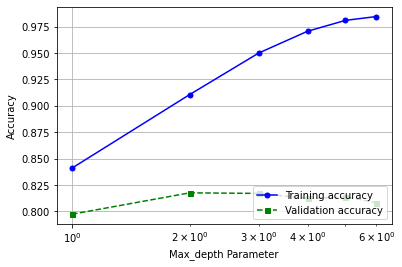

In [ ]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(max_depth, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(max_depth, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('Max_depth Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
# GridSearchCV عرض وضائف  
gridSearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_xgbregressor__min_child_weight', 'param_xgbregressor__max_depth', 'param_xgbregressor__learning_rate', 'param_xgbregressor__gamma', 'param_xgbregressor__colsample_bytree', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
# عرض متوسط قيم دقة  كل خاصية 
gridSearch.cv_results_['mean_test_score']

array([0.78462122, 0.80486978, 0.81727599, 0.79811358, 0.8093385 ,
       0.80143997, 0.77860639, 0.80321065, 0.80208946, 0.80779627,
       0.80382453, 0.80575004, 0.79485159, 0.818668  , 0.80823883,
       0.81670316, 0.79991673, 0.80258667, 0.77765052, 0.74938024,
       0.76430962, 0.79380284, 0.7998053 , 0.80561233, 0.8003904 ,
       0.7650653 , 0.80176167, 0.81592927, 0.79235512, 0.79385183,
       0.77534607, 0.78125611, 0.78451464, 0.81865645, 0.80714652,
       0.79891822, 0.76844298, 0.821352  , 0.77516852, 0.7743304 ,
       0.81899657, 0.8159078 , 0.78451728, 0.79485182, 0.79327394,
       0.79684878, 0.81085282, 0.77196535, 0.79143466, 0.79064252,
       0.81489096, 0.81270906, 0.79725222, 0.80093858, 0.77590073,
       0.80598882, 0.67591863, 0.80586689, 0.74814292, 0.79400087,
       0.79803788, 0.7906398 , 0.75435789, 0.76610004, 0.80692346,
       0.7699429 , 0.82079738, 0.80198678, 0.79359046, 0.79764816,
       0.80737181, 0.79082851, 0.80895507, 0.80636773, 0.81854

<img src="https://i.ibb.co/4JtGHCy/predict.jpg" width=150 ></img>

In [ ]:
# التنبؤ من خلال توظيف أفضل المعايير التي تم تحديدها  سابقا
y_pred=gridSearch.predict(X_test)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# تقويم  نموذج الانحدار الخطي
 
from sklearn import  metrics
print(f" MAE : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE : {metrics.mean_squared_error(y_test, y_pred)}")
print(f" RMSE : {np.sqrt(metrics.r2_score(y_test, y_pred)):.3}")
print(f" R^2 : {metrics.r2_score(y_test, y_pred)}")
print(f" Expalined Variance Score : {metrics.explained_variance_score(y_test, y_pred)}")

 MAE : 0.115
 MSE : 0.0290587581391133
 RMSE : 0.911
 R^2 : 0.8294965707327697
 Expalined Variance Score : 0.8294968942798662


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


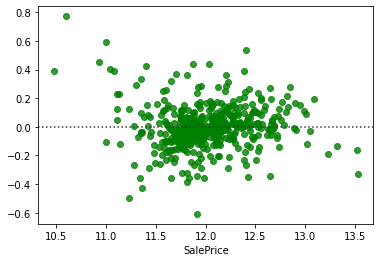

In [ ]:
# Residuals    عرض تخطيط تشتت البواقي
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
_=sns.residplot(y_test,y_pred, color='green')

In [ ]:
# عرض جدول القيم التي تم التنبؤ بها ومقارنتها بتلك التي بالجدول الأصلي 
pd.DataFrame({"Predicted":y_pred, "Actual Price": y_test}).sample(6, random_state=10)

,Predicted,Actual Price
506,12.291966,12.278398
425,11.530373,11.813037
1013,11.809592,11.350418
410,11.784986,11.002117
548,11.783810,11.736077
620,11.325290,11.112463


In [ ]:
pip install scikit-plot


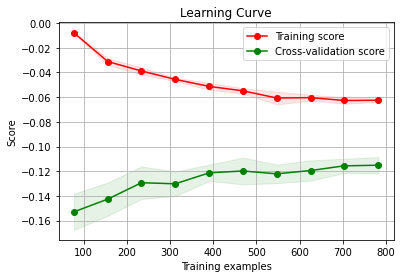

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(pipe_XGBR, 
                                     X_train, y_train, 
                                     scoring="neg_mean_absolute_error",  
                                     train_sizes=np.linspace(.1, 1.0, 10) ,  
                                     ) # neg_mean_absolute_error"

In [ ]:
https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
https://mc.ai/using-machine-learning-to-predict-price-of-product-on-mercari/